In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
data_frame = pd.DataFrame(iris.data, columns=iris.feature_names)
data_frame = data_frame.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')
data_frame.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [12]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(data_frame)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
data_frame['cluster'] = y_predicted
data_frame.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [14]:
data_frame['cluster'].unique()

array([1, 2, 0], dtype=int32)

In [15]:
cl1 = data_frame[data_frame['cluster'] == 0]
cl2 = data_frame[data_frame['cluster'] == 1]
cl3 = data_frame[data_frame['cluster'] == 2]

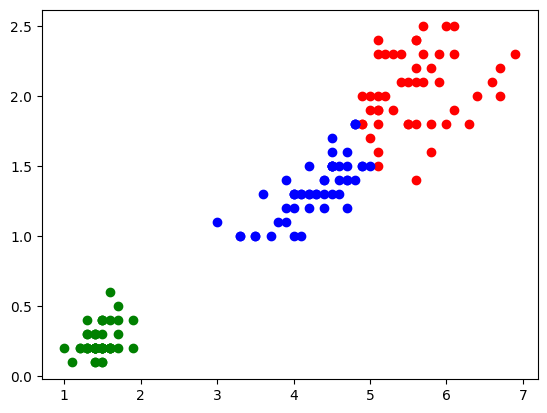

In [17]:
plt.scatter(cl1['petal length (cm)'], cl1['petal width (cm)'], color='red')
plt.scatter(cl2['petal length (cm)'], cl2['petal width (cm)'], color='green')
plt.scatter(cl3['petal length (cm)'], cl3['petal width (cm)'], color='blue')
plt.show()

In [23]:
sse = []
for i in range(1, 10):
  km = KMeans(n_clusters=i)
  km.fit(data_frame)
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

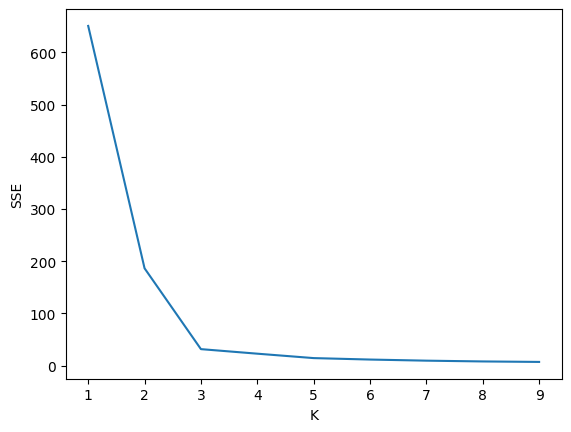

In [24]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1, 10), sse)